## Observations and Insights 

In [ ]:
#Summary Observations:
    # Ramicane had the lowest final tumor volumes of the four target drug regimens analyzed 
        #(implying this to be the most efficient regimen)
    # Ifubuinol had the highest final tumor volumes of hte four target drug regimens analyzed 
        #(implying this to be the least efficient regimen)
    # There is a direct correlation between mouse weight and tumor volume
    #

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
master_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
master_data_df=pd.DataFrame(master_data)
master_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice.
mouse_list=master_data_df["Mouse ID"].unique()
mouse_count=len(mouse_list)
mouse_count

249

In [4]:
#determine how many timepoints there should be for each record
timepointcount=master_data_df.nunique()["Timepoint"]
timepointcount

10

In [5]:
#create a list of timepoints in the dataset for later reference
timepoints=master_data_df["Timepoint"].unique()
timepoints

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#group the data by mouse ID and identify any ID with too many timepoints which would indicate duplicate measurements
mouse_group=master_data_df.groupby("Mouse ID").count()
mouse_group=mouse_group.sort_values("Timepoint", ascending=False)
mouse_group



,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,13,13,13,13,13,13,13
a203,10,10,10,10,10,10,10
n364,10,10,10,10,10,10,10
m546,10,10,10,10,10,10,10
m550,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...
x226,1,1,1,1,1,1,1
b447,1,1,1,1,1,1,1
f932,1,1,1,1,1,1,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = master_data_df.groupby("Mouse ID").head()
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = master_data_df.loc[master_data_df["Mouse ID"] != "g989"]
clean_mice_df=pd.DataFrame(clean_mice)
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice_list = clean_mice_df["Mouse ID"].unique()
clean_mice_list
clean_mice_count=len(clean_mice_list)
clean_mice_count

248

In [10]:
#for reference
clean_mice_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [11]:
#rearrange the columns to
organized_mice_df=clean_mice_df[['Drug Regimen', 'Mouse ID', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
organized_mice_df

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Ramicane,k403,Male,21,16,0,45.000000,0
1,Ramicane,k403,Male,21,16,5,38.825898,0
2,Ramicane,k403,Male,21,16,10,35.014271,1
3,Ramicane,k403,Male,21,16,15,34.223992,1
4,Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,Naftisol,z969,Male,9,30,25,63.145652,2
1889,Naftisol,z969,Male,9,30,30,65.841013,3
1890,Naftisol,z969,Male,9,30,35,69.176246,4
1891,Naftisol,z969,Male,9,30,40,70.314904,4


In [12]:
#capture the list of drug regimens for later use
drugs = organized_mice_df["Drug Regimen"].unique()
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mean=organized_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median=organized_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var=organized_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std=organized_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]


drug_tumorvol_summary=pd.DataFrame({"Tumor Volume Mean": mean, "Tumor Volume Median": median,
                                  "Variance": var, "Tumor STD": std})
drug_tumorvol_summary

,Tumor Volume Mean,Tumor Volume Median,Variance,Tumor STD
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation=clean_mice_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'count'])["Tumor Volume (mm3)"]
summary_aggregation

,mean,median,var,std,count
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,178
Infubinol,52.884795,51.820584,43.128684,6.567243,178
Ketapril,55.235638,53.698743,68.553577,8.279709,188
Naftisol,54.331565,52.509285,66.173479,8.134708,186
Placebo,54.033581,52.288934,61.168083,7.821003,181
Propriva,52.320930,50.446266,43.852013,6.622085,148
Ramicane,40.216745,40.673236,23.486704,4.846308,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,181


In [15]:
drug_group=pd.DataFrame(summary_aggregation)
new_drug_group=drug_group.reset_index()
new_drug_group

,Drug Regimen,mean,median,var,std,count
0,Capomulin,40.675741,41.557809,24.947764,4.994774,230
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,178
2,Infubinol,52.884795,51.820584,43.128684,6.567243,178
3,Ketapril,55.235638,53.698743,68.553577,8.279709,188
4,Naftisol,54.331565,52.509285,66.173479,8.134708,186
5,Placebo,54.033581,52.288934,61.168083,7.821003,181
6,Propriva,52.320930,50.446266,43.852013,6.622085,148
7,Ramicane,40.216745,40.673236,23.486704,4.846308,228
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,181
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,182


In [16]:
new_drug_group.columns

Index(['Drug Regimen', 'mean', 'median', 'var', 'std', 'count'], dtype='object')

## Bar and Pie Charts

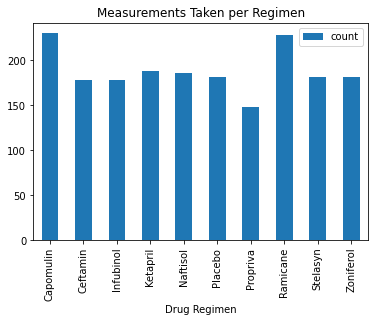

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_count=new_drug_group.loc[:,['Drug Regimen','count']]
measure_chart=measure_count.plot(kind="bar", x="Drug Regimen", title="Measurements Taken per Regimen")

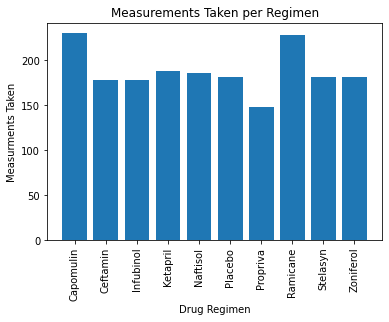

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
#plt.figure(figsize=(20,3))
plt.bar(x_axis, new_drug_group["count"])
plt.xticks(tick_locations, new_drug_group["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurments Taken")
plt.title("Measurements Taken per Regimen")
plt.show()
 #color='r', alpha=0.5, align="center

In [23]:
#Gather the data on gender by unique mouse IDs 
gender_data=organized_mice_df.groupby('Sex').nunique()["Mouse ID"]
gender_df=pd.DataFrame(gender_data)
gender_df=gender_df.rename(columns={"Mouse ID": "Number of Mice"})
gender_data

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

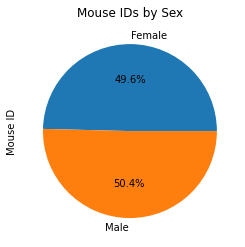

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie=gender_data.plot(kind="pie", y="Number of Mice", title="Mouse IDs by Sex", autopct="%1.1f%%")



Text(0.5, 1.0, 'Mouse IDs by Gender')

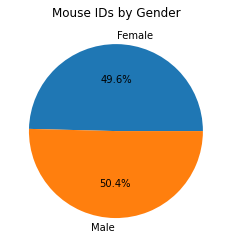

In [27]:
# Generate a pie plot showing the distribution of female versus male lab mice using pyplot
gender_data=organized_mice_df.groupby('Sex').nunique()["Mouse ID"]
gender_df=pd.DataFrame(gender_data)
gender_df=gender_df.rename(columns={"Mouse ID": "Number of Mice"})
gender_data2=gender_df.reset_index()
gender_data2

labels=gender_data2["Sex"].unique()
plt.pie(gender_data2["Number of Mice"], labels=labels,autopct="%1.1f%%")
plt.title("Mouse IDs by Gender")




In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#To calculate final tumor volume, identify the final(max) timepoint and group data by the mouse IDs 
Max_Tumor=organized_mice_df.groupby(["Mouse ID"])['Timepoint'].max()
Max_Tumor=Max_Tumor.reset_index()

#use a left merge to combine the data frames, setting the new "Max Tumor" data to be the left data set and merge on left

merged_data=Max_Tumor.merge(organized_mice_df, on=['Mouse ID', 'Timepoint'], how="left")
merged_data

# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [36]:
#set a list of the target drug regimens and an empty list to hold the tumor volumes

treatment_list=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_vol_list=[]


for drug in treatment_list: 
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)
    
    #calculate quartiles & IQR per drug
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #calculate the bounds per drug
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    
    #determine outliers 
    outliers=final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


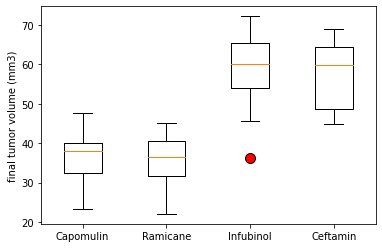

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out=dict(markerfacecolor="red", markersize=10)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=orange_out)
plt.ylabel('final tumor volume (mm3)')
plt.show()

## Line and Scatter Plots

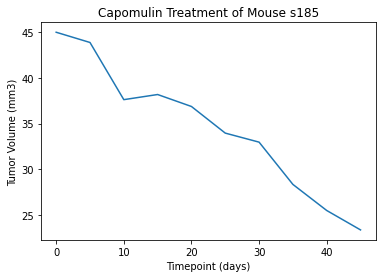

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table=organized_mice_df.loc[organized_mice_df['Drug Regimen'] == "Capomulin"]
mouse_data=capomulin_table.loc[capomulin_table['Mouse ID'] == "s185"]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse s185')
plt.show()


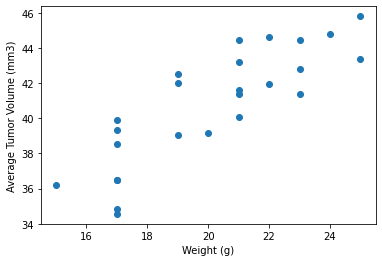

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table=organized_mice_df.loc[organized_mice_df['Drug Regimen'] == "Capomulin"]
capomulin_average=capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


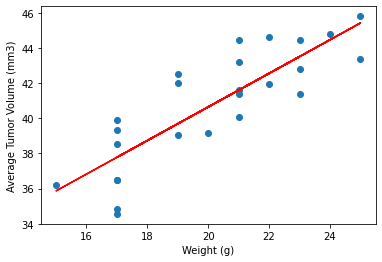

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(sts.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model=sts.linregress(capomulin_average['Weight (g)'], capomulin_average ['Tumor Volume (mm3)'])
y_values=capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], y_values, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()